In [1]:
import GPy
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib;matplotlib.rcParams['figure.figsize'] = (4,2.5)
import matplotlib;matplotlib.rcParams['text.usetex'] = True
import matplotlib;matplotlib.rcParams['font.size'] = 8
import matplotlib;matplotlib.rcParams['font.family'] = 'serif'

from matplotlib import pyplot as plt

In [2]:
var = 100
lengthscale = 0.05
total_num_of_dots = 100
start_num_of_dots = 10
end_num_of_dots = 80
test_size = 20

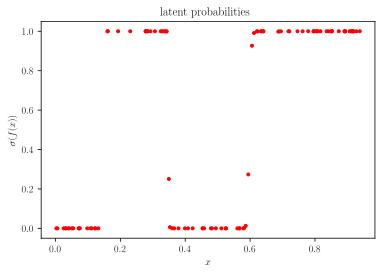

In [25]:
k = GPy.kern.RBF(1, variance=var, lengthscale=lengthscale)
X = np.random.rand(total_num_of_dots, 1)

#draw the latent function value
f = np.random.multivariate_normal(np.zeros(total_num_of_dots), k.K(X))
lik = GPy.likelihoods.Bernoulli()
p = lik.gp_link.transf(f)

plt.plot(X, p, 'r.')
plt.title('latent probabilities');plt.xlabel('$x$');plt.ylabel('$\sigma(f(x))$')

Y = lik.samples(f).reshape(-1,1)

from sklearn.model_selection import train_test_split
U, X_train, y_U, y_train = train_test_split(X, Y, test_size = start_num_of_dots)
U, X_test, y_U, y_test = train_test_split(X, Y, test_size = test_size)

m = GPy.core.GP(X=X_train,
                Y=y_train, 
                kernel=k, 
                inference_method=GPy.inference.latent_function_inference.expectation_propagation.EP(),
                likelihood=lik)

In [4]:
m._raw_predict(X_train)

(array([[ 10.1531297 ],
        [  9.24311348],
        [  8.8745018 ],
        [ -4.68004051],
        [ -8.86767531],
        [ -7.93865036],
        [  9.05521542],
        [-10.00214485],
        [  9.05360551],
        [  4.72235868]]), array([[35.43912802],
        [25.14805461],
        [34.71539682],
        [15.41915921],
        [37.24801193],
        [36.96486566],
        [37.88035456],
        [40.56365226],
        [37.87420624],
        [13.50267467]]))

In [5]:
import scores
import utils

K = utils.get_K(m, X_train)
inv_K = np.linalg.inv(K)

In [6]:
scores.calculate_scores_vari(U, m, X_train, y_train, K, inv_K)

array([[53.11190689],
       [37.22441754],
       [99.99981982],
       [13.50267467],
       [32.84371961],
       [96.43800229],
       [74.43986059],
       [36.5647775 ],
       [52.39335808],
       [96.62791223],
       [13.73620139],
       [40.82172933],
       [12.73478827],
       [99.99916356],
       [99.93579309],
       [78.90678048],
       [68.08778498],
       [44.71374279],
       [35.05085174],
       [32.95799569],
       [99.86375883],
       [97.1814785 ],
       [98.99311307],
       [96.60603526],
       [25.07426274],
       [37.88035456],
       [32.71737888],
       [15.41915921],
       [99.92934609],
       [24.83779202],
       [34.71539682],
       [88.27060739],
       [93.6573862 ],
       [81.08149351],
       [16.37337039],
       [64.29238878],
       [99.97871787],
       [48.7327629 ],
       [54.51808305],
       [38.95247978],
       [80.34947094],
       [44.44402508],
       [38.42301723],
       [21.19818016],
       [37.12011894],
       [99

In [7]:
def calculate_vari(U, m, X_train, y_train, K, inv_K):
    return m._raw_predict(U.reshape(-1, 1))[1]

In [8]:
calculate_vari(U, m, X_train, y_train, K, inv_K).shape

(80, 1)

In [9]:
a = np.zeros((X_train.shape[0], 1))
for i in range(X_train.shape[0]):
    a[i] = m.kern.K_of_r(np.linalg.norm(X_train[i] - U[0]) / lengthscale)
a

array([[2.06261476e-02],
       [2.75858358e+00],
       [2.49821094e-03],
       [3.71083671e+01],
       [4.04744257e+01],
       [1.51589733e-61],
       [1.07054530e-30],
       [8.60686840e+01],
       [2.66924828e-35],
       [9.48371653e+00]])

In [10]:
m.kern.K(np.expand_dims(np.array(U[0]), 1), X_train).T

array([[2.06261476e-02],
       [2.75858358e+00],
       [2.49821094e-03],
       [3.71083671e+01],
       [4.04744257e+01],
       [1.51589733e-61],
       [1.07054530e-30],
       [8.60686840e+01],
       [2.66924828e-35],
       [9.48371653e+00]])

In [11]:
t = []
for j in range(len(X_train)):
    t.append(1 if m.predict(X_train[j].reshape(-1, 1))[0][0] >= 0.5 else -1)
t

[1, 1, 1, -1, -1, -1, 1, -1, 1, 1]

In [12]:
U

array([[0.09489057],
       [0.94853411],
       [0.52236261],
       [0.20341693],
       [0.72186802],
       [0.61780234],
       [0.78810073],
       [0.29805019],
       [0.11285835],
       [0.82980829],
       [0.17067392],
       [0.93275872],
       [0.17550785],
       [0.49261481],
       [0.45588207],
       [0.65203239],
       [0.90406802],
       [0.75503638],
       [0.24258259],
       [0.71938756],
       [0.44839488],
       [0.61430913],
       [0.60041078],
       [0.82968659],
       [0.14865432],
       [0.70158059],
       [0.31208966],
       [0.16529397],
       [0.45495406],
       [0.22842076],
       [0.32507909],
       [0.80680654],
       [0.81851832],
       [0.89045542],
       [0.21290443],
       [0.66816378],
       [0.56024468],
       [0.68516606],
       [0.76686599],
       [0.7459182 ],
       [0.89132908],
       [0.69071622],
       [0.13326349],
       [0.15405935],
       [0.94283943],
       [0.47579571],
       [0.24069726],
       [0.733

In [13]:
t = np.array([1 if x[0] >= 0.5 else -1 for x in m.predict(U)[0]])

In [14]:
t

array([-1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1])

In [15]:
print(m.predict(U)[0])

[[0.08714846]
 [0.10001841]
 [0.50044585]
 [0.89251929]
 [0.95300623]
 [0.56162557]
 [0.70705774]
 [0.95287875]
 [0.08743219]
 [0.53471644]
 [0.18269003]
 [0.11722139]
 [0.26625049]
 [0.50085423]
 [0.50764473]
 [0.68268069]
 [0.24960086]
 [0.8872629 ]
 [0.9587429 ]
 [0.9524523 ]
 [0.51130059]
 [0.55407282]
 [0.53087993]
 [0.53509916]
 [0.06765377]
 [0.92678037]
 [0.95185079]
 [0.12404948]
 [0.50803352]
 [0.96467866]
 [0.93122346]
 [0.61724079]
 [0.57220335]
 [0.31861947]
 [0.94725459]
 [0.76947873]
 [0.50414467]
 [0.86332095]
 [0.8278253 ]
 [0.9207558 ]
 [0.31441674]
 [0.8890238 ]
 [0.07177491]
 [0.07410605]
 [0.09954546]
 [0.50243963]
 [0.95997462]
 [0.94702924]
 [0.13440984]
 [0.09880079]
 [0.5003744 ]
 [0.08457167]
 [0.43420738]
 [0.20787429]
 [0.72264105]
 [0.89812203]
 [0.50037659]
 [0.93543582]
 [0.53059549]
 [0.08357002]
 [0.13515572]
 [0.95371181]
 [0.50092609]
 [0.91545252]
 [0.5025108 ]
 [0.45521809]
 [0.51429249]
 [0.89533581]
 [0.92676044]
 [0.07580677]
 [0.95168531]
 [0.06

In [16]:
a = m.kern.K(np.expand_dims(np.array(U[0]), 1), X_train).T
a

array([[2.06261476e-02],
       [2.75858358e+00],
       [2.49821094e-03],
       [3.71083671e+01],
       [4.04744257e+01],
       [1.51589733e-61],
       [1.07054530e-30],
       [8.60686840e+01],
       [2.66924828e-35],
       [9.48371653e+00]])

In [17]:
A = m.kern.K(U, X_train).T
A.shape

(10, 80)

In [18]:
a.shape

(10, 1)

In [19]:
f_u = np.dot(np.transpose(y_train), np.dot(inv_K, a))

In [20]:
f_u

array([[-6.4091149e+08]])

In [21]:
f_u = np.dot(np.transpose(y_train), np.dot(inv_K, A))
f_u

array([[-6.40911490e+08,  2.36801802e+07,  5.24579255e+05,
         3.67314227e+08,  3.84391014e+07,  9.07201660e+07,
        -1.72912079e+08, -3.16964900e+08,  3.08556911e+08,
        -7.33954355e+07,  1.88629889e+09,  2.27709814e+07,
         1.74424856e+09, -1.18994368e+06, -8.69178755e+06,
         1.93293766e+08,  1.47111566e+07, -1.44207782e+08,
        -1.10992640e+09,  5.44097391e+07, -1.17912866e+07,
         8.13544653e+07,  4.99221290e+07, -7.36856616e+07,
         1.94023729e+09,  1.56540376e+08, -9.32544949e+07,
         1.99227153e+09, -9.04274530e+06, -8.04600380e+08,
         2.22246061e+07, -1.33076262e+08, -1.02002700e+08,
         7.95993941e+06, -1.44912204e+08,  2.22133146e+08,
         7.57085642e+06,  2.12784702e+08, -1.74179910e+08,
        -1.05639384e+08,  8.46039720e+06,  1.98888624e+08,
         1.41542774e+09,  2.02072456e+09,  2.36480178e+07,
        -3.30637398e+06, -1.08716802e+09, -3.35258160e+07,
         2.19194159e+07,  2.37027438e+07,  1.91263432e+0

In [22]:
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])

np.multiply(a, b)

array([1, 4, 9])

In [23]:
t_f_u = np.multiply(t, f_u)

In [24]:
t_f_u.shape

(1, 80)

In [25]:
b = np.full(U.shape, m.kern.K_of_r(0))

In [26]:
b.shape

(80, 1)

In [27]:
b

array([[100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [10

In [28]:
import scores
scores.calculate_scores_RKHS(U, m, X_train, y_train, K, inv_K)

array([[-2.63238832e+07],
       [-2.29916739e+06],
       [ 9.18421437e+06],
       [-3.79608362e+06],
       [-9.28628317e+05],
       [-1.68723953e+06],
       [-1.93599994e+06],
       [ 1.23226153e+06],
       [-3.85708166e+06],
       [-1.87425787e+06],
       [ 1.30489959e+07],
       [-2.30411522e+06],
       [ 1.29240552e+07],
       [-6.04823030e+05],
       [-3.49473368e+05],
       [-1.66190943e+06],
       [-2.37544226e+06],
       [-2.13201679e+06],
       [-2.46934233e+07],
       [-1.09940006e+06],
       [-2.99733120e+05],
       [-1.68882899e+06],
       [-1.69407914e+06],
       [-1.87441929e+06],
       [ 1.38735550e+07],
       [-1.49928500e+06],
       [ 2.51135669e+05],
       [ 1.32271243e+07],
       [-3.43235967e+05],
       [-7.10356326e+06],
       [-2.05432896e+04],
       [-1.90249387e+06],
       [-1.88793658e+06],
       [-2.64731194e+06],
       [-2.50925561e+05],
       [-1.63842819e+06],
       [-1.70733061e+06],
       [-1.59383519e+06],
       [-2.0

In [29]:
b = np.full(U.shape, m.kern.K_of_r(0))
y = y_train

A = m.kern.K(U, X_train)

t = np.array([1 if x[0] >= 0.5 else -1 for x in m.predict(U)[0]])

K_1A = np.dot(inv_K, A.T)
f_u = np.dot(np.transpose(y_train), K_1A)
t_f_u = np.multiply(t, f_u)

aKa = np.expand_dims(np.diagonal(np.dot(A, K_1A)), 1)

scores = np.divide((np.ones(t_f_u.shape) - t_f_u) ** 2, (b - aKa).T)

scores

array([[-2.63238832e+07, -2.29916739e+06,  9.18421437e+06,
        -3.79608362e+06, -9.28628317e+05, -1.68723953e+06,
        -1.93599994e+06,  1.23226153e+06, -3.85708166e+06,
        -1.87425787e+06,  1.30489959e+07, -2.30411522e+06,
         1.29240552e+07, -6.04823030e+05, -3.49473368e+05,
        -1.66190943e+06, -2.37544226e+06, -2.13201679e+06,
        -2.46934233e+07, -1.09940006e+06, -2.99733120e+05,
        -1.68882899e+06, -1.69407914e+06, -1.87441929e+06,
         1.38735550e+07, -1.49928500e+06,  2.51135669e+05,
         1.32271243e+07, -3.43235967e+05, -7.10356326e+06,
        -2.05432896e+04, -1.90249387e+06, -1.88793658e+06,
        -2.64731194e+06, -2.50925561e+05, -1.63842819e+06,
        -1.70733061e+06, -1.59383519e+06, -2.01882508e+06,
        -2.34640234e+06, -2.60755874e+06, -1.57066202e+06,
         1.53227116e+07,  1.36411256e+07, -2.30028669e+06,
        -4.85993722e+05, -2.08216025e+07, -5.95412765e+06,
        -2.30769324e+06, -2.29973503e+06,  2.47639544e+0

In [30]:
a = np.array([0, 2, 3])
b = np.array([1, 2, 3])
np.divide(b, a)

 /home/dahakot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning:divide by zero encountered in true_divide


array([inf,  1.,  1.])

In [31]:
import scores
print(f'{scores.calculate_scores_l2fm(U, m, X_train, y_train, K, inv_K)[0][0]:9.9f}')

16808333150.691711426


In [32]:
memory = []
scores = []
        
b = np.full(U.shape, m.kern.K_of_r(0))
A = m.kern.K(U, X_train).T
    
AK_1 = np.dot(A.T, inv_K)
aKa = np.expand_dims(np.diagonal(np.dot(AK_1, A)), 1)
aKy = np.dot(AK_1, y_train)

for i in range(U.shape[0]):
    score = 0
    t = 1 if m.predict(U[i].reshape(-1, 1))[0] >= 0.5 else -1
    t = np.full(U.shape, t)
    
    Kuv = m.kern.K(np.expand_dims(np.array(U[i]), 1), U).T
    
    numerator = np.multiply(aKa - Kuv, aKy - t)
        
    diff = np.divide(numerator, b - aKa)
    if i == 0:
        memory.append(b - aKa)
        memory.append(aKa - Kuv)
        memory.append(aKy - t)
        memory.append(diff)
    
    scores.append(np.linalg.norm(diff))
    
print(scores)
137819876081.666809082
137819876081.667480469

[16808333150.691713, 16808333080.40041, 16808333080.130604, 16808333083.121944, 16808333078.4391, 16808333079.53467, 16808333078.498423, 16808333084.425377, 16808333144.70513, 16808333078.616978, 16808333099.715645, 16808333080.304703, 16808333096.628044, 16808333078.027891, 16808333076.091417, 16808333079.010454, 16808333080.225716, 16808333078.385984, 16808333080.531893, 16808333078.451595, 16808333076.01646, 16808333079.61142, 16808333079.961658, 16808333078.61688, 16808333116.865591, 16808333078.567656, 16808333084.402061, 16808333103.483957, 16808333076.075382, 16808333080.153122, 16808333083.906357, 16808333078.570007, 16808333078.600939, 16808333080.228775, 16808333081.292952, 16808333078.850988, 16808333080.933725, 16808333078.700785, 16808333078.41494, 16808333078.379065, 16808333080.227993, 16808333078.654097, 16808333130.098171, 16808333112.298475, 16808333080.362219, 16808333076.872631, 16808333080.426859, 16808333078.396729, 16808333080.28102, 16808333080.378422, 168083330

137819876081.66748

In [33]:
scores = []

b = np.full(U.shape, m.kern.K_of_r(0))
A = m.kern.K(U, X_train).T
    
AK_1 = np.dot(A.T, inv_K)
aKa = np.expand_dims(np.diagonal(np.dot(AK_1, A)), 1)

aKy = np.dot(AK_1, y_train)    
t = np.array([1 if x[0] >= 0.5 else -1 for x in m.predict(U)[0]]).reshape(-1, 1)
t = np.repeat(t, U.shape[0], axis = 1).T

multiplier = np.divide(aKy - t, b - aKa)

Kuv = m.kern.K(np.array(U), U)
     
diff = np.multiply(multiplier, aKa - Kuv)

scores = np.linalg.norm(diff, axis = 0)
    
print(scores)

[1.68083332e+10 1.68083331e+10 1.68083331e+10 1.68083331e+10
 1.68083331e+10 1.68083331e+10 1.68083331e+10 1.68083331e+10
 1.68083331e+10 1.68083331e+10 1.68083331e+10 1.68083331e+10
 1.68083331e+10 1.68083331e+10 1.68083331e+10 1.68083331e+10
 1.68083331e+10 1.68083331e+10 1.68083331e+10 1.68083331e+10
 1.68083331e+10 1.68083331e+10 1.68083331e+10 1.68083331e+10
 1.68083331e+10 1.68083331e+10 1.68083331e+10 1.68083331e+10
 1.68083331e+10 1.68083331e+10 1.68083331e+10 1.68083331e+10
 1.68083331e+10 1.68083331e+10 1.68083331e+10 1.68083331e+10
 1.68083331e+10 1.68083331e+10 1.68083331e+10 1.68083331e+10
 1.68083331e+10 1.68083331e+10 1.68083331e+10 1.68083331e+10
 1.68083331e+10 1.68083331e+10 1.68083331e+10 1.68083331e+10
 1.68083331e+10 1.68083331e+10 1.68083331e+10 1.68083332e+10
 1.68083331e+10 1.68083331e+10 1.68083331e+10 1.68083331e+10
 1.68083331e+10 1.68083331e+10 1.68083331e+10 1.68083331e+10
 1.68083331e+10 1.68083331e+10 1.68083331e+10 1.68083331e+10
 1.68083331e+10 1.680833

In [34]:
print(f'{scores[0]:9.9f}')

16808333150.691713333


In [35]:
print("b - aKa: ", (b - aKa)[0][0])
print("aKa - Kuv: ", (aKa - Kuv)[0][0])
print("aKy - t: ", (aKy - t)[0][0])

b - aKa:  -15604367049.476084
aKa - Kuv:  15604367049.476084
aKy - t:  -2172488084.417646


In [36]:
print(diff.T[0][70])
print(memory[0][0])
print(diff.shape)
print(np.linalg.norm(diff.T[0]))
print(np.linalg.norm(diff, axis = 0)[0])

2658274349.430204
[-1.5604367e+10]
(80, 80)
16808333150.691713
16808333150.691713


In [37]:
print(diff.T[0] == memory[0])

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [38]:
print((aKy - t) == memory[2])
print((diff) == memory[3])

[[ True  True False ... False False False]
 [ True  True False ... False False False]
 [ True  True False ... False False False]
 ...
 [ True  True False ... False False False]
 [ True  True False ... False False False]
 [ True  True False ... False False False]]
[[ True False False ... False False False]
 [ True False False ... False False False]
 [ True  True False ... False False False]
 ...
 [ True  True False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [39]:
(aKy - t)[1][0]

56499446.29438669

In [40]:
memory[2][1][0]

56499446.29438669

In [41]:
x = (aKa - Kuv).T[0]
x[5]

4877877971.295332

In [42]:
memory[1][5][0]


4877877971.295332

In [26]:
from sklearn.datasets import make_blobs

In [37]:
X, Y = make_blobs(np.array([40, 60]), n_features=2, centers=None, 
                  cluster_std=2.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

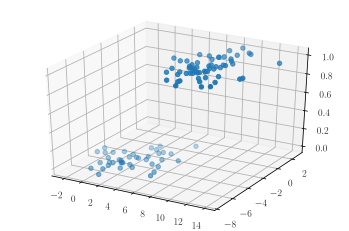

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.T[0], X.T[1], Y, zdir='z', s=20, c=None, depthshade=True)

 /home/dahakot/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f5b64ddc0b8>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7f5b64dcff28>]}

 /home/dahakot/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


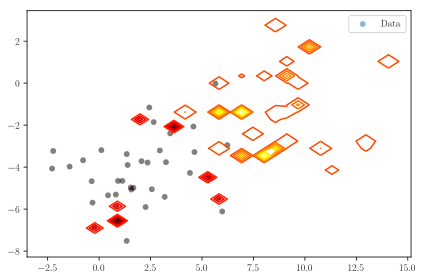

In [39]:
k = GPy.kern.RBF(2, variance=var, lengthscale=lengthscale)

m = GPy.core.GP(X=X,
                Y=Y.reshape(-1, 1), 
                kernel=k, 
                inference_method=GPy.inference.latent_function_inference.expectation_propagation.EP(),
                likelihood=lik)

m.plot(plot_density = True)

In [1]:
import pandas as pd

In [9]:
dataset = pd.read_csv("HTRU_2.csv", header = None, names = ["0", "1", "2", "3", "4", "5", "6", "7", "class"])

In [18]:
Y = dataset["class"].values
X = dataset[["0", "1", "2", "3", "4", "5", "6", "7"]].values
print(Y.shape)
print(X.shape)

(17898,)
(17898, 8)


In [21]:
from sklearn.model_selection import train_test_split
import torch.nn as nn

class Data(nn.Module):
    def __init__(self, ndim, total_n, start_n, end_n, test_size):
        super(Data, self).__init__()
        
        self.start_n = start_n
        self.end_n = end_n
        self.test_size = test_size
    
    def generate_data(self):
        dataset = pd.read_csv("HTRU_2.csv", header = None, 
                              names = ["0", "1", "2", "3", "4", "5", "6", "7", "class"])
        
        self.Y = dataset["class"].values
        self.X = dataset[["0", "1", "2", "3", "4", "5", "6", "7"]].values

        self.U, self.X_train, self.y_U, self.y_train = train_test_split(
                                                        self.X, 
                                                        self.Y, 
                                                        test_size = self.start_n)
        
        self.U, self.X_test, self.y_U, self.y_test = train_test_split(
                                                        self.U, 
                                                        self.y_U, 
                                                        test_size = self.test_size)

        return self.U, self.X_train, self.y_U, self.y_train, self.X_test, self.y_test

In [22]:
data = Data(0, 0, 10, 1000, 0.2)

In [23]:
data

Data()

In [25]:
data = data.generate_data()

In [27]:
data[0].shape

(14310, 8)

In [28]:
data[1].shape

(10, 8)

In [29]:
data[2].shape

(14310,)

In [30]:
data[3].shape

(10,)

In [31]:
data[4].shape

(3578, 8)

In [32]:
data[5].shape

(3578,)

In [16]:
import numpy as np

data = np.zeros(50)
print(data.shape)

(50,)


In [17]:
for i in range(20):
    print(data.shape)
    print(data[-10:].shape)
    data = data[:-1]

(50,)
(10,)
(49,)
(10,)
(48,)
(10,)
(47,)
(10,)
(46,)
(10,)
(45,)
(10,)
(44,)
(10,)
(43,)
(10,)
(42,)
(10,)
(41,)
(10,)
(40,)
(10,)
(39,)
(10,)
(38,)
(10,)
(37,)
(10,)
(36,)
(10,)
(35,)
(10,)
(34,)
(10,)
(33,)
(10,)
(32,)
(10,)
(31,)
(10,)
